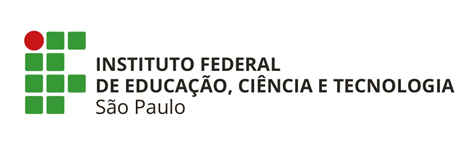

<h1><center>Avaliação 2</center></h1>
<br>

<h3><center>D1AED – Análise Estatística para Ciência de Dados</center></h3>
<br>

<h3><center>Pós Graduação – Ciência de Dados
<br>
Professor: Samuel Martins e Ricardo Sovat</center></h3>

<br>
<br>

<h4><right>Ede Miranda Júnior – CP3013596
</right></h4>
<br>
<br>

<h3><center>Campinas, São Paulo</center></h3>





#Carregamento das bibliotecas e dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Semestre 1/ANALISE ESTATÍSTICA PARA CIÊNCIA DE DADOS/AVALIAÇÕES/Avaliação 2/archive/Consumo_cerveja.csv', decimal=',') #Lendo o arquivo do conjunto de dados e substituindo a vírgula por ponto

#Pré-processamento

In [12]:
df.columns = df.columns.str.replace(' ','_') #Atualizando o nome das colunas
df.columns = df.columns.str.replace('[)(]' ,'')

In [13]:
df.info() #Verificando os tipos de dados
df.isnull().sum() #Verificando os nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data                       365 non-null    object 
 1   Temperatura_Media_C        365 non-null    float64
 2   Temperatura_Minima_C       365 non-null    float64
 3   Temperatura_Maxima_C       365 non-null    float64
 4   Precipitacao_mm            365 non-null    float64
 5   Final_de_Semana            365 non-null    float64
 6   Consumo_de_cerveja_litros  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.6+ KB


Data                         576
Temperatura_Media_C          576
Temperatura_Minima_C         576
Temperatura_Maxima_C         576
Precipitacao_mm              576
Final_de_Semana              576
Consumo_de_cerveja_litros    576
dtype: int64

In [14]:
df["Consumo_de_cerveja_litros"] = df["Consumo_de_cerveja_litros"].astype(float) #Convertendo o consumo de cervejas em float
df = df.dropna() #Removendo o nulos

In [15]:
df.head() #Exibindo as cinco primeias linhad do dataset

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [16]:
df.shape #Numero de linhas e colunas

(365, 7)

In [17]:
df.describe().round(2) #Sumarizando as informações em todas as colunas

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


In [18]:
df.corr().round(4) #Matriz de correlação

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
Temperatura_Media_C,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
Temperatura_Minima_C,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
Temperatura_Maxima_C,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
Precipitacao_mm,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
Final_de_Semana,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
Consumo_de_cerveja_litros,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


#Comportamento da variável dependente

Nos próximos passos será observado o comportamento da variável dependente (Consumo de Cerveja) em relação à Temperatura Máxima, Precipitação e Fim de Semana.

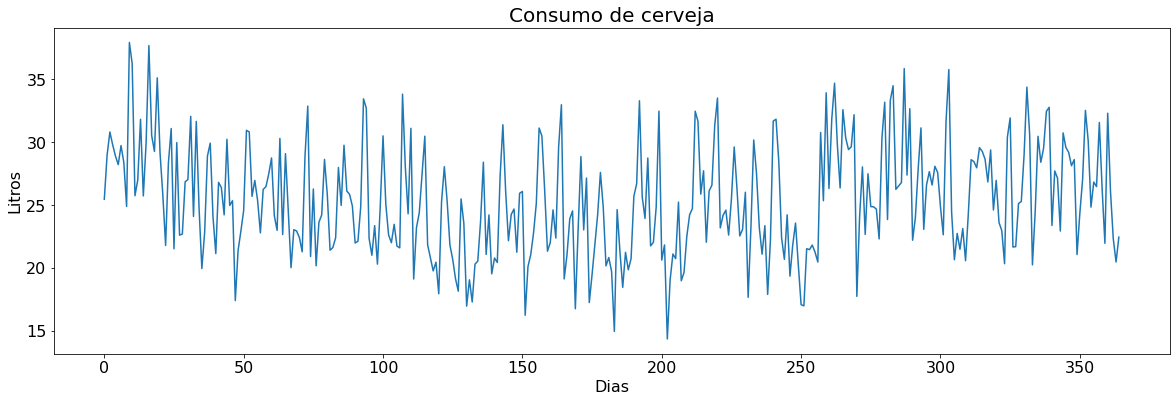

In [20]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = df['Consumo_de_cerveja_litros'].plot(fontsize=16)

Investigando a variável dependente (y) de acordo com uma característica

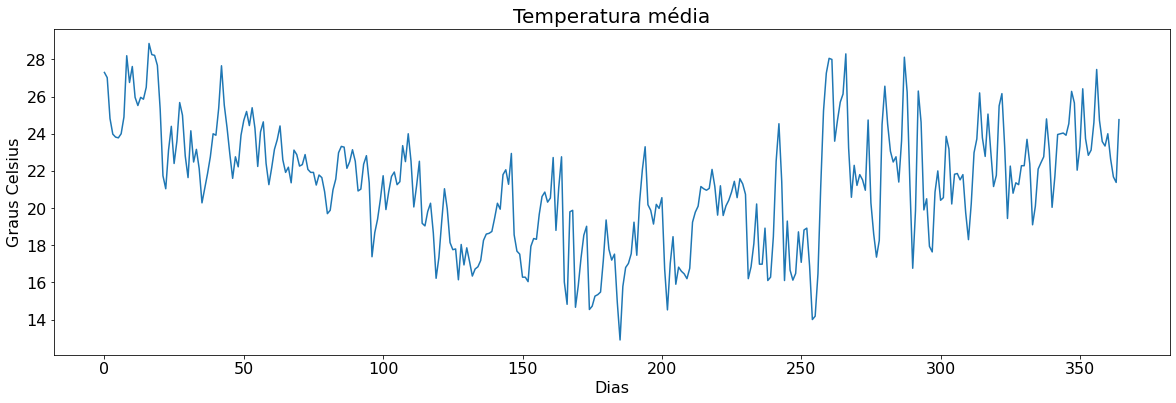

In [21]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Temperatura média', fontsize=20)
ax.set_xlabel('Dias', fontsize=16)
ax.set_ylabel('Graus Celsius', fontsize=16)
ax = df['Temperatura_Media_C'].plot(fontsize=16)

Nota-se que nos finais de semana o consumo de uma quantidade maior de litros de cerveja.

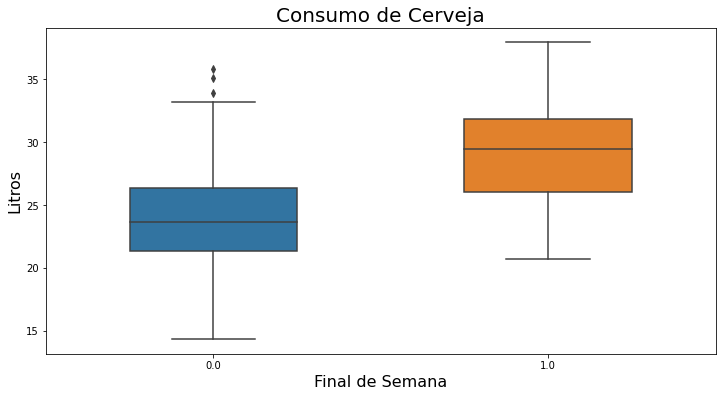

In [23]:
ax = sns.boxplot(x = 'Final_de_Semana', y = 'Consumo_de_cerveja_litros', data = df, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

#Variável Dependente X Variáveis Explicativas

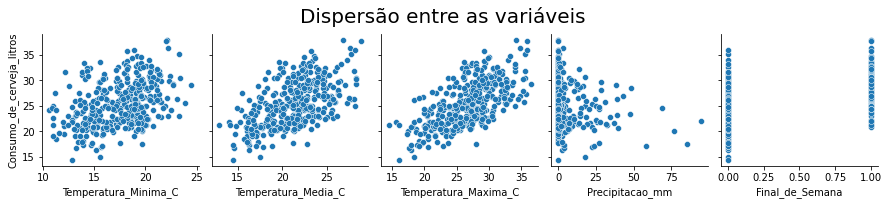

In [24]:
ax = sns.pairplot(df, y_vars = 'Consumo_de_cerveja_litros', x_vars = ['Temperatura_Minima_C', 'Temperatura_Media_C', 'Temperatura_Maxima_C', 'Precipitacao_mm', 'Final_de_Semana'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.10)
ax

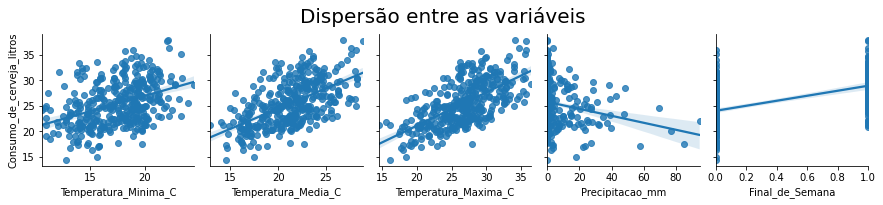

In [25]:
ax = sns.pairplot(df, y_vars='Consumo_de_cerveja_litros', x_vars=['Temperatura_Minima_C', 'Temperatura_Media_C', 'Temperatura_Maxima_C', 'Precipitacao_mm', 'Final_de_Semana'], kind='reg')
ax.fig.suptitle("Dispersão entre as variáveis", fontsize=20, y=1.10)
ax

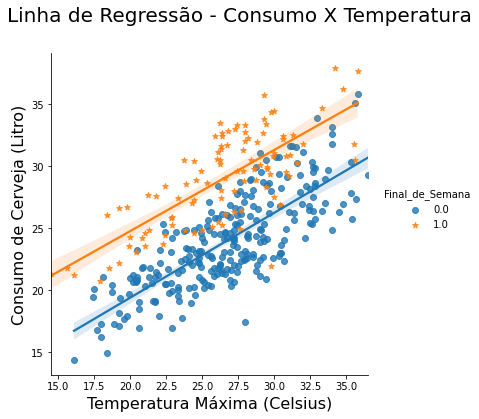

In [26]:
ax = sns.lmplot(x = 'Temperatura_Maxima_C', y = 'Consumo_de_cerveja_litros', data = df, hue='Final_de_Semana', markers=['o', '*'], legend=False)
ax.fig.suptitle("Linha de Regressão - Consumo X Temperatura", fontsize=20, y=1.10)
ax.set_xlabels("Temperatura Máxima (Celsius)", fontsize=16)
ax.set_ylabels("Consumo de Cerveja (Litro)", fontsize=16)
ax.add_legend(title="Final_de_Semana")
ax

#Regressão Linear

In [27]:
from sklearn.model_selection import train_test_split

Criação de uma série para armazenar o consumo de cerveja

In [28]:
y = df['Consumo_de_cerveja_litros']

Criação de um DataFrame para armazenar as variáveis explicativas

In [29]:
X = df[['Temperatura_Maxima_C', 'Precipitacao_mm', 'Final_de_Semana']]

Criação dos conjuntos de dados de treinamento e teste

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

Verificando o shape

In [31]:
X_train.shape

(255, 3)

In [32]:
X_test.shape

(110, 3)

In [33]:
X.shape[0] * 0.3

109.5

In [34]:
X.shape[0] * 0.7

255.49999999999997

#Função de regressão com três variáveis explicativas

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Obtendo o coeficiente de determinação

In [38]:
print("R2 = {}".format(model.score(X_train, y_train).round(2)))

R2 = 0.73


In [40]:
y_predict = model.predict(X_test)

In [41]:
print("R2 = %s" % metrics.r2_score(y_test, y_predict).round(2))

R2 = 0.69


#Criação de um simulador simples

In [43]:
temp_maxima = 40
precipitacao = 0
final_semana = 1
entrada = [[temp_maxima, precipitacao, final_semana]]

print('Consumo: {0:.2f} litros'.format(model.predict(entrada)[0]))

Consumo: 38.74 litros


In [44]:
entrada2 = X_test[0:1]
entrada2

,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana
5,30.5,12.2,0.0


In [46]:
#Consumo médio em litros em um dia de temperatura máxima de 30.5, com precipitação de chuva de 12.2 mm e não é final de semana
model.predict(entrada2)[0]

26.094901775262013

#Conclusão

Quando a temperatura máxima é alta o consumo de cerveja também é alto, quando é  fim de semana o consumo de cerveja também é alto, podemos observar isso em detalhes em nossa matriz de correlação.

Usando o simulador podemos prever em média a quantidade em litros que será consumida quando as variáveis temperatura média, precipitação e fim de semana forem preenchidas.